# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

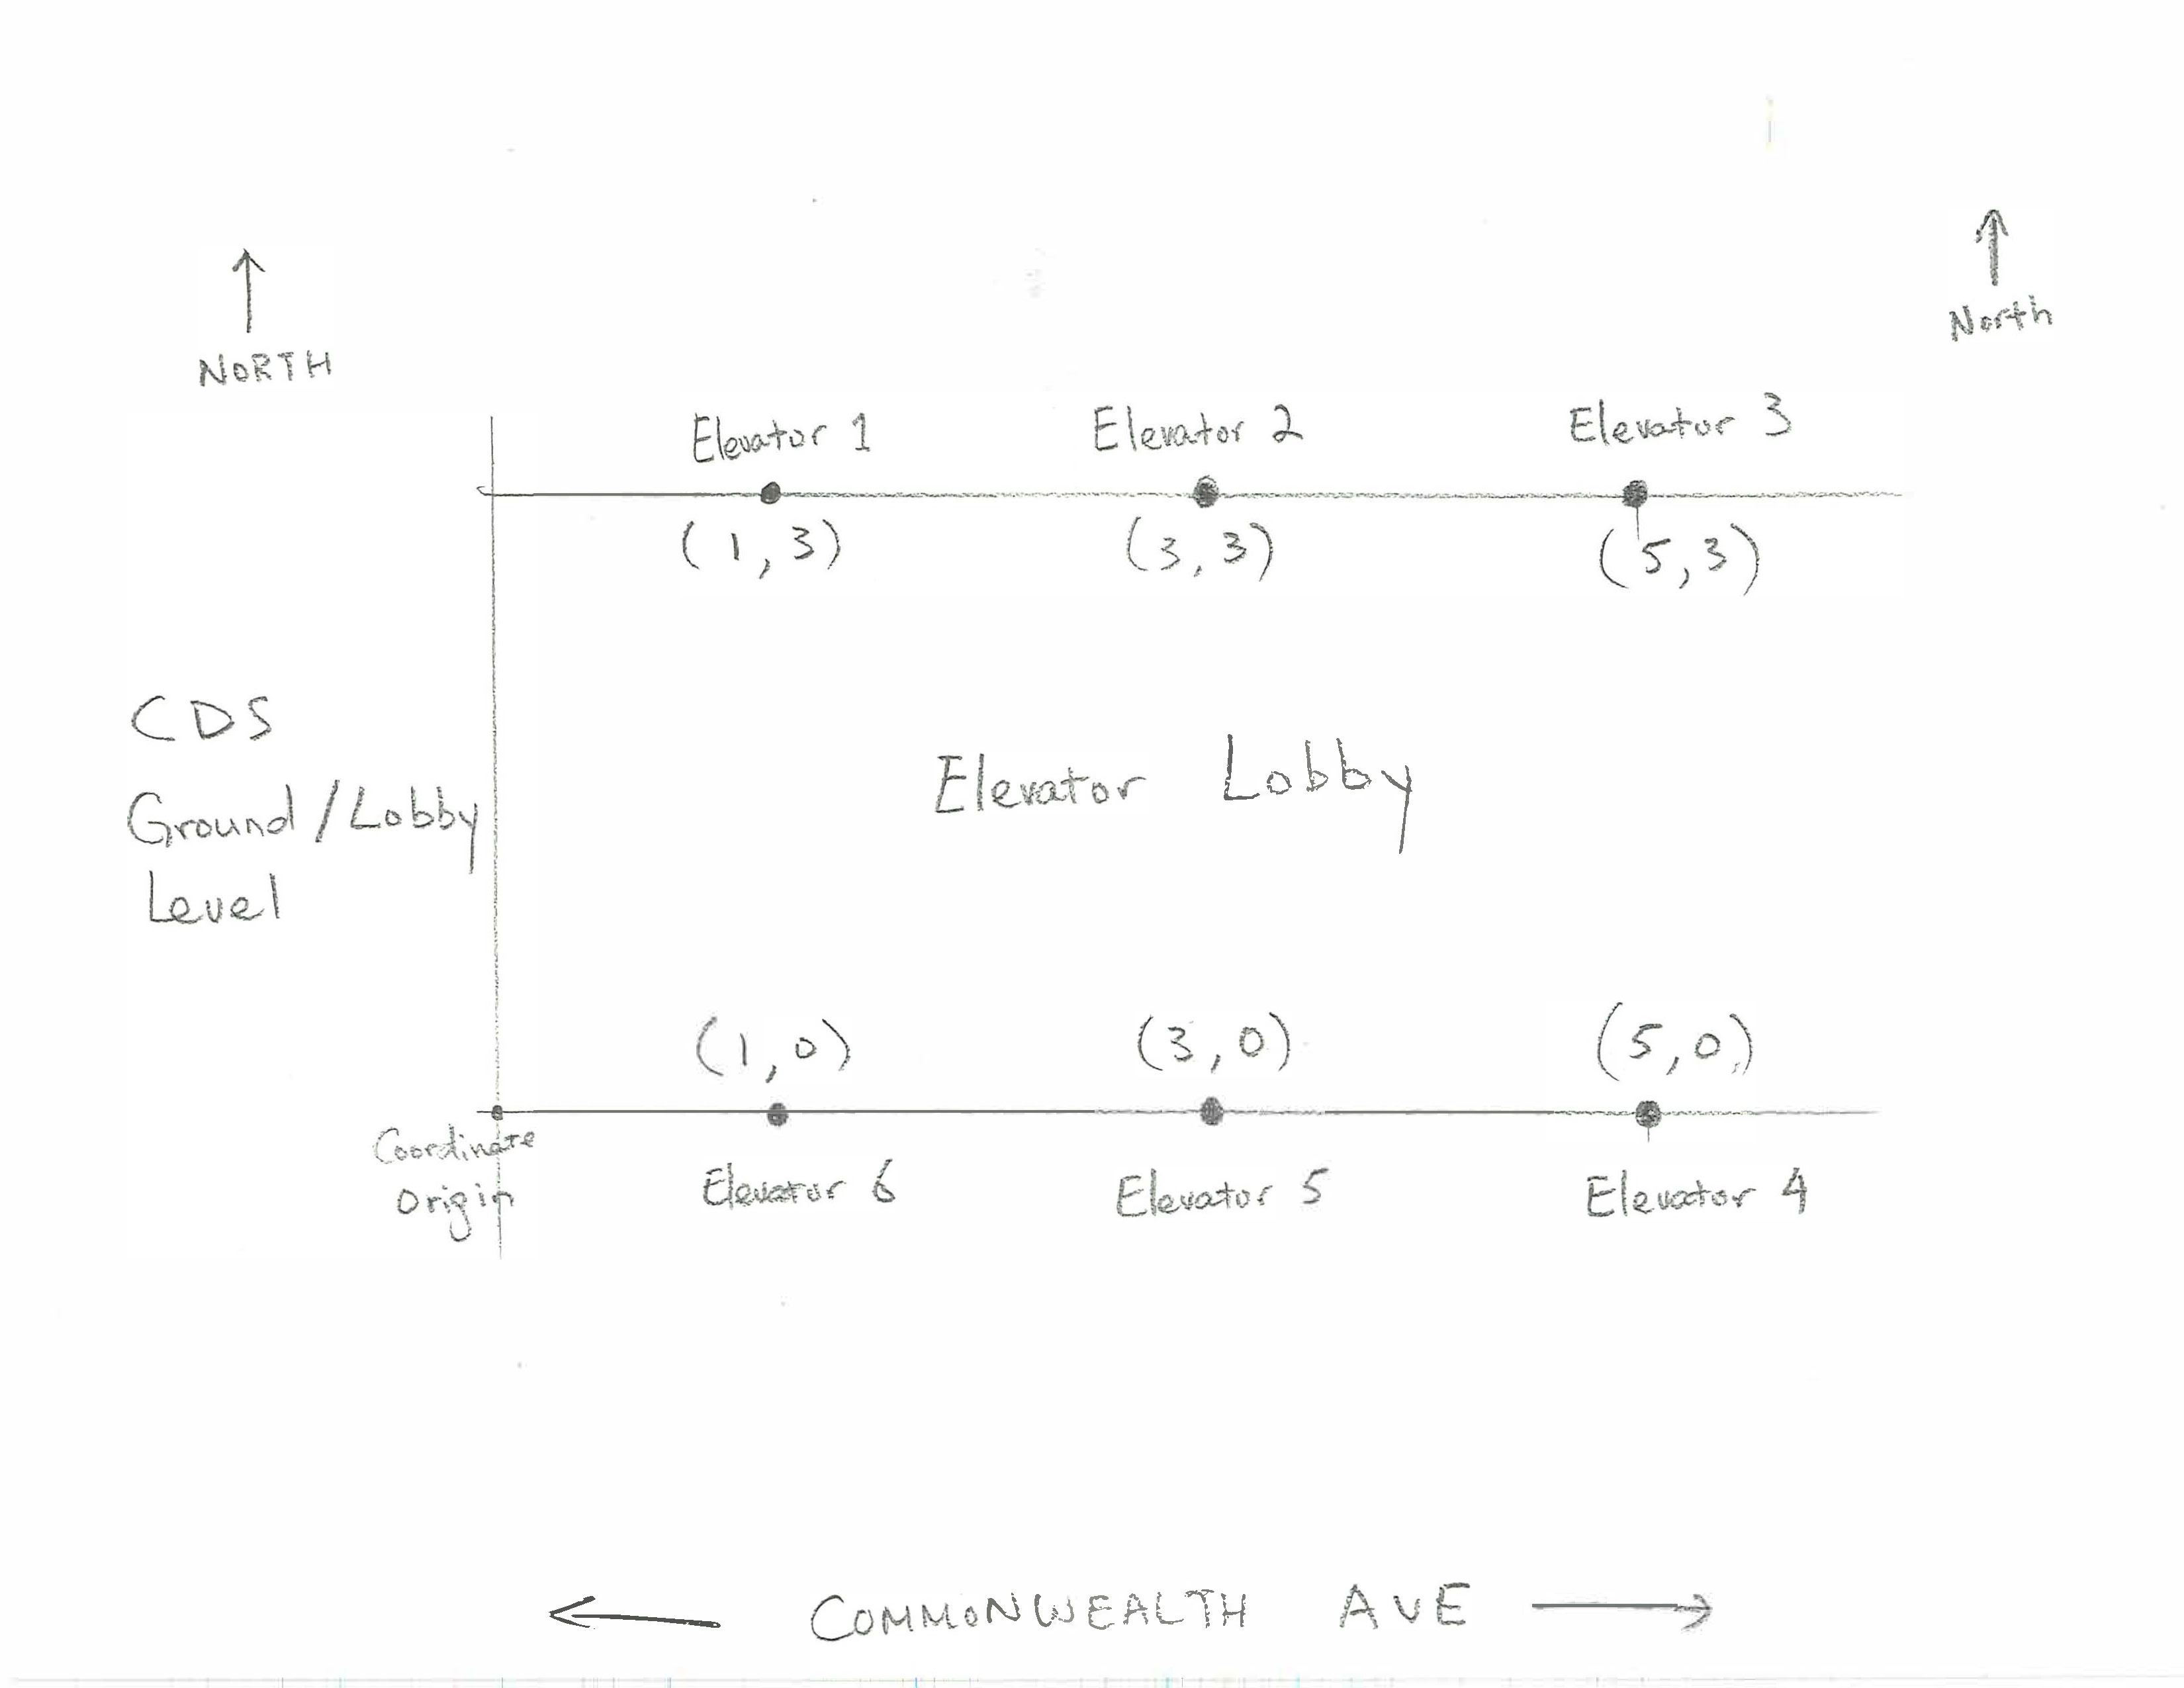

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

**Answer:** (1+3+5+1+3+5)/6=3,(3+3+3+0+0+0)/6=1.5. So we should stand at (3,1.5) because it is the central point of elevators. 

**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

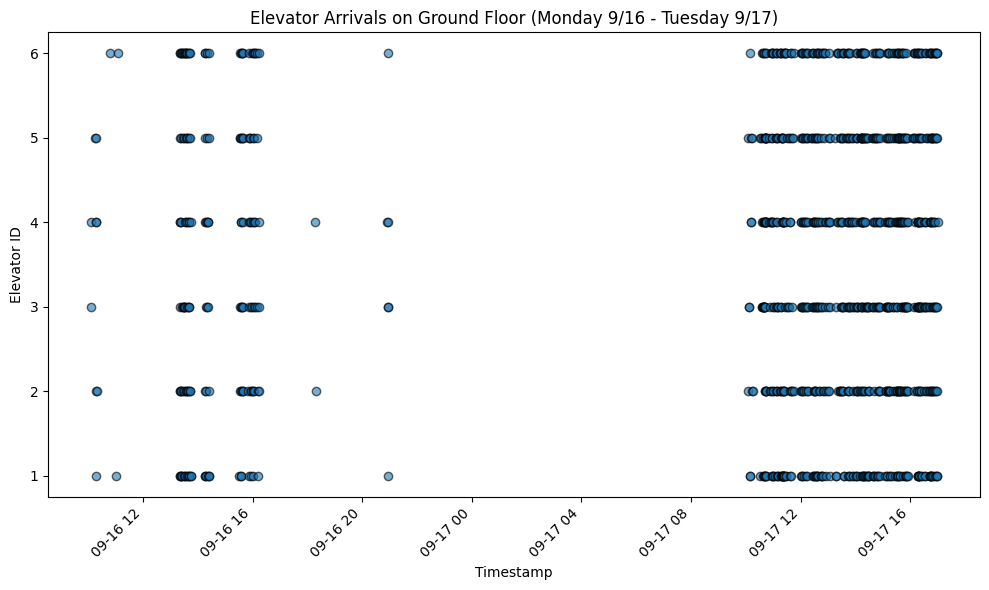

In [46]:
# Code for question 1:
import matplotlib.pyplot as plt
import pandas as pd
def make_plot():
    '''
    You will need to read the training data CSV file and do some processing first.
    '''
    ### TODO
    df = pd.read_csv("/Users/xiachuancheng/Documents/CS506/Lab1/CDS Elevator Arrivals (Responses) - Form Responses 1.csv")

    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    start_date = '2024-09-16'
    end_date = '2024-09-18'

    df_filtered = df[(df['Timestamp'] >= start_date) & (df['Timestamp'] < end_date)]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df_filtered['Timestamp'], df_filtered['Elevator ID'], alpha=0.6, edgecolors='k')

    # Set labels and title
    plt.xlabel('Timestamp')
    plt.ylabel('Elevator ID')
    plt.title('Elevator Arrivals on Ground Floor (Monday 9/16 - Tuesday 9/17)')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.tight_layout()
    plt.show()
make_plot()
    
	
    

State observations here (briefly).

9-17 is significantly more intensive than 9-16. Most of this is due to the fact that fewer people went to the records on the 16th than on the 17th. Both days of the elevator activities were centered around the 12 to 16 time frame. This may be due to the fact that this is the time when the greatest number of students come to and leave classes, thus increasing the frequency of elevator use. These six elevators had almost similar numbers of activities, not significantly few or many. This means that no elevator is overused and the workload is evenly distributed

**Question 3**: Make a table listing the average *frequency*
for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [117]:
# Write any data processing code you need here
import pandas as pd

def calculate_frequency_with_gaps(df,start_date, end_date):
    # Convert the 'Timestamp' column to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    df_filtered = df[(df['Timestamp'] >= start_date) & (df['Timestamp'] < end_date)]
    
    df_filtered = df_filtered.sort_values(by='Timestamp')
    
    
    df_filtered['time_diff'] = df_filtered['Timestamp'].diff().dt.total_seconds()
    
    threshold = 3600  
    gaps = df_filtered[df_filtered['time_diff'] > threshold]['time_diff'].sum()

   
    total_time_seconds = (df_filtered['Timestamp'].max() - df_filtered['Timestamp'].min()).total_seconds() - gaps

   
    result = {'Elevator ID': [], 'Total data collection time (seconds)': [], 
              'Number of arrivals': [], 'Average frequency (arrivals per second)': []}
    
    for elevator_id in df_filtered['Elevator ID'].unique():
       
        df_elevator = df_filtered[df_filtered['Elevator ID'] == elevator_id]
        
        
        num_arrivals = len(df_elevator)
        
       
        avg_frequency = num_arrivals / total_time_seconds if total_time_seconds > 0 else 0
        
       
        result['Elevator ID'].append(elevator_id)
        result['Total data collection time (seconds)'].append(total_time_seconds)
        result['Number of arrivals'].append(num_arrivals)
        result['Average frequency (arrivals per second)'].append(avg_frequency)
    
  
    result_df = pd.DataFrame(result)
    
  
    print(result_df)

    return result_df


df = pd.read_csv("/Users/xiachuancheng/Documents/CS506/Lab1/CDS Elevator Arrivals (Responses) - Form Responses 1.csv")
calculate_frequency_with_gaps(df,'2024-09-16','2024-09-18')


## TODO

   Elevator ID  Total data collection time (seconds)  Number of arrivals  \
0            4                               35309.0                 171   
1            3                               35309.0                 175   
2            5                               35309.0                 169   
3            1                               35309.0                 158   
4            2                               35309.0                 164   
5            6                               35309.0                 162   

   Average frequency (arrivals per second)  
0                                 0.004843  
1                                 0.004956  
2                                 0.004786  
3                                 0.004475  
4                                 0.004645  
5                                 0.004588  


,Elevator ID,Total data collection time (seconds),Number of arrivals,Average frequency (arrivals per second)
0,4,35309.0,171,0.004843
1,3,35309.0,175,0.004956
2,5,35309.0,169,0.004786
3,1,35309.0,158,0.004475
4,2,35309.0,164,0.004645
5,6,35309.0,162,0.004588


**Answer:** TODO

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Total data collection time (seconds) | 35309 | 35309 | 35309 | 35309 | 35309 |35309 |
| Number of arrivals | 158 |164 | 175 | 171 | 169 |162 |
| Average frequency (arrivals per second) | 0.004475| 0.004645 | 0.004956 | 0.004843 | 0.004786 |0.004588 |

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

**Answer:** 171+175+169+158+164+162=999. ID-1:158/999, ID-2:164/999, ID-3:175/999, ID-4:171/999, ID-5:169/999, ID-6:162/999. The probability of an elevator being the next to arrive is based on how often that elevator has arrived in the past.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | 158/999 | 164/999 | 175/999 | 171/999 | 169/999 |162/999 |

**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


**Answer:** We calculate weighted average for both the x and y coordinates based on the the arrival probabilities to determining the optimal location. 
x=(1*(158/999))+(3*(164/999))+(5*(175/999))+(5*(171/999))+(3*(169/999))+(1*(162/999))=3.052
y=(3*(158/999))+(3*(164/999))+(3*(175/999))+(0*(171/999))+(0*(169/999))+(0*(162/999))=1.4925
In that case, the optimal location is (3.052,1.4925)

**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [120]:
# Your code here
import numpy as np
import pandas as pd
def get_average_walk_distance(data, coordinate,start_date, end_date):
    '''
    data is a csv file containing the data.
    coordinate is the coordinate to wait at.
    '''
    ### TODO
   
    freq_df = calculate_frequency_with_gaps(data, start_date, end_date)
    
    total_arrivals = freq_df['Number of arrivals'].sum()
    
    freq_df['Probability'] = freq_df['Number of arrivals'] / total_arrivals
    
    elevator_positions = {
        1: (1, 3),
        2: (3, 3),
        3: (5, 3),
        4: (5, 0),
        5: (3, 0),
        6: (1, 0)
    }
    
    total_distance = 0
    
    for _, row in freq_df.iterrows():
        elevator_id = row['Elevator ID']
        
        probability = row['Probability']
       
        elevator_pos = elevator_positions[elevator_id]
        
        distance = np.sqrt((coordinate[0] - elevator_pos[0]) ** 2 + (coordinate[1] - elevator_pos[1]) ** 2)
        
        weighted_distance = distance * probability
        
        total_distance += weighted_distance
    
   
    
    return total_distance
# example usage

df1 = pd.read_csv("/Users/xiachuancheng/Documents/CS506/Lab1/CDS Elevator Arrivals (Responses) - Form Responses 1.csv")
get_average_walk_distance(df1,(3.052,1.4925),'2024-09-16','2024-09-18')


   Elevator ID  Total data collection time (seconds)  Number of arrivals  \
0            4                               35309.0                 171   
1            3                               35309.0                 175   
2            5                               35309.0                 169   
3            1                               35309.0                 158   
4            2                               35309.0                 164   
5            6                               35309.0                 162   

   Average frequency (arrivals per second)  
0                                 0.004843  
1                                 0.004956  
2                                 0.004786  
3                                 0.004475  
4                                 0.004645  
5                                 0.004588  


np.float64(2.165982134841474)

**Answer:** The average distance of the coordinate in question1 is 2.1666666666666665. The average distance of the coordinate in question5 is 2.165982134841474.

## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
|Naive position (Question 1) | 2.1666666666666665 | 2.163793103448276 |
|Smart position (Question 5) | 2.165982134841474 | 2.163469296078746 |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:** Statistically, I did find a good location. Because both in the training data and the test data, it is the optimized position that has a shorter average distance.